*   Chapter 2 : Linear Regression
*   Chapter 3 : Gradient Descent, Optimization

# 2 Linear Regression

## 2.1 Linear Regression Prediction
*   Simple Linear Regression
*   Problem: Prediction
*   PyTorch
*   Problem: Prediction
> *   Class Linear
> *   Build Custom Modules using nn.module

In [3]:
import torch

w = torch.tensor(2.0, requires_grad=True)
b = torch.tensor(-1.0, requires_grad=True)

def forward(x):
  y = w*x + b
  return y

x = torch.tensor([1.0])
yhat = forward(x)
yhat

tensor([1.], grad_fn=<AddBackward0>)

In [6]:
from torch.nn import Linear
torch.manual_seed(1)
model = Linear(in_features=1, out_features=1)
y = model(x)
y

tensor([0.0739], grad_fn=<AddBackward0>)

In [7]:
list(model.parameters())

[Parameter containing:
 tensor([[0.5153]], requires_grad=True), Parameter containing:
 tensor([-0.4414], requires_grad=True)]

In [13]:
# Custom Module
import torch.nn as nn
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    output = self.linear(x)
    return output

In [14]:
model = LR(1,1)
model.state_dict()

OrderedDict([('linear.weight', tensor([[-0.9414]])),
             ('linear.bias', tensor([0.5997]))])

In [15]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.9414]], requires_grad=True), Parameter containing:
 tensor([0.5997], requires_grad=True)]

In [16]:
x = torch.tensor([[1.0], [2.0]])
yhat = model(x)
yhat

tensor([[-0.3417],
        [-1.2832]], grad_fn=<AddmmBackward0>)

## 2.2 Linear Regression Training
*   Dataset
*   Noise Assumption : Gaussian Distribution
*   Training
*   Loss : Mean Squared Error(MSE)

## 2.3 Gradient Descent and Cost
*   What's Gradient Descent
*   Problems with the Learning Rate
*   When to Stop Gradient Descent

In [18]:
import torch
w = torch.tensor(-10.0, requires_grad=True)

X = torch.arange(-3,3, 0.1).view(-1,1)
f = -3 *X

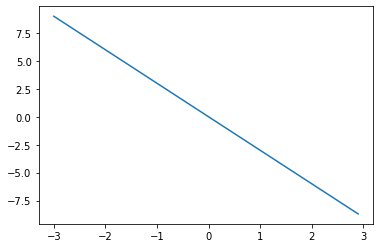

In [19]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

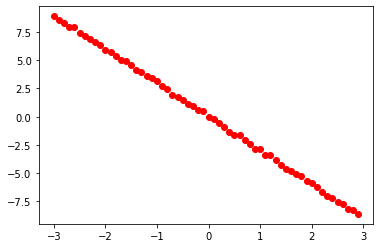

In [20]:
# Add Random Noise
Y = f + 0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

In [21]:
def forward(x):
  return w*x

def criterion(yhat, y):
  # MSE Loss
  return torch.mean((yhat-y)**2)

In [25]:
lr = 0.1
list_cost = []

for epoch in range(4):

  Yhat = forward(X)
  loss = criterion(Yhat, Y)
  loss.backward() # get Gradient
  w.data = w.data - lr * w.grad.data # update Weight
  w.grad.data.zero_() # init Gradient

  list_cost.append(loss.item())
  
list_cost

[0.10531739890575409,
 0.024671506136655807,
 0.011789659969508648,
 0.009732002392411232]

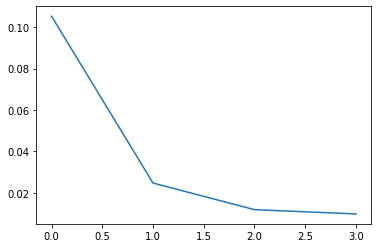

In [26]:
plt.plot(list(range(4)), list_cost)
plt.show()

## 2.4 Linear Regression Training
*   Cost Surface
*   Minimizing the Cost Surface in PyTorch via first principles

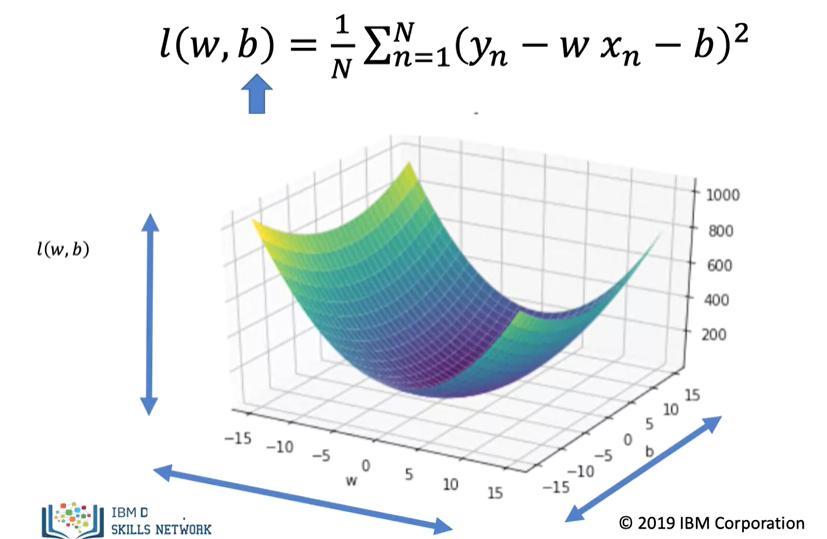

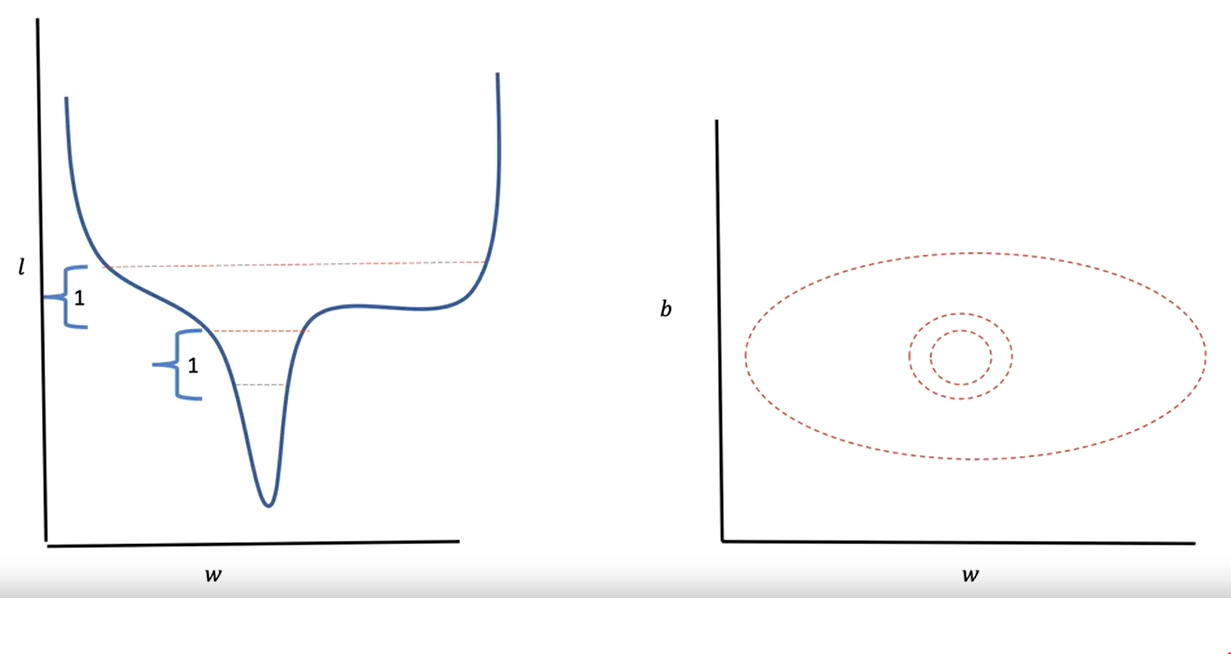

In [99]:
# init
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3,3,0.1).view(-1,1)

f = 1*X -1
Y = f + 0.1*torch.randn(X.size())

In [100]:
w.item()

-15.0

In [101]:
def forward(x):
  y = w*x + b
  return y

def criterion(yhat, y):
  return torch.mean((yhat-y)**2)

In [102]:
import numpy as np
class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        # W와 B의 range 설정
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<Figure size 432x288 with 0 Axes>

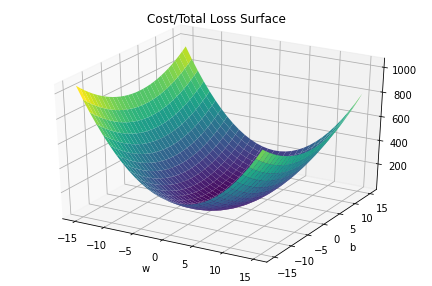

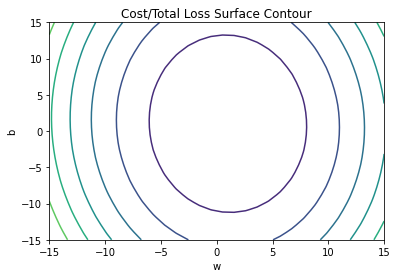

In [103]:
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

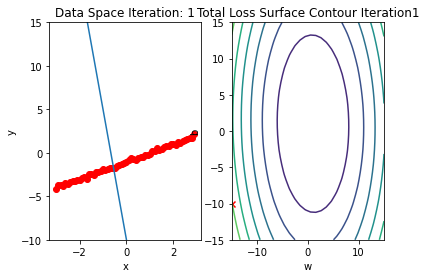

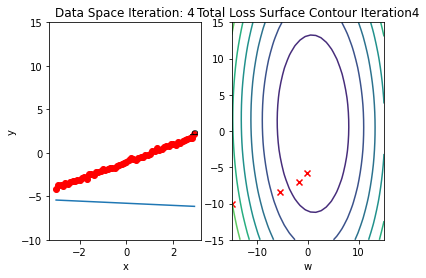

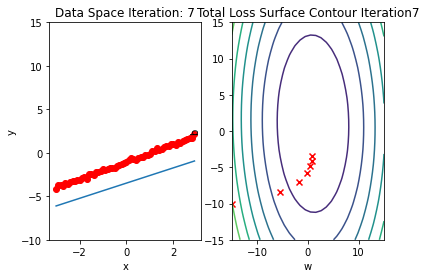

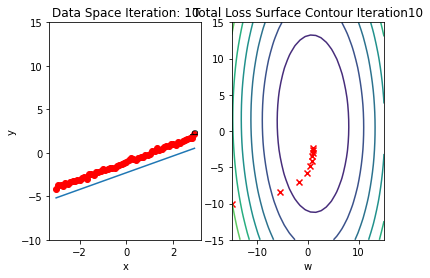

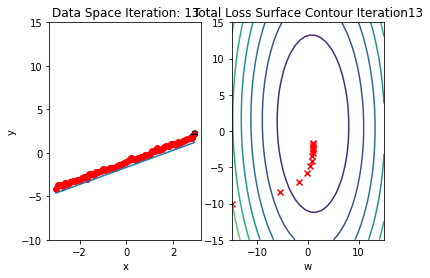

In [104]:
lr = 0.1
LOSS_BGD = []
list_w = [w.item()]
list_b = [b.item()]

for epoch in range(15):
  Yhat = forward(X)
  loss = criterion(Yhat, Y)

  # Section for plotting
  get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
  if epoch % 3 == 0:
    get_surface.plot_ps()
  
  loss.backward()

  w.data = w.data - lr*w.grad.data
  w.grad.data.zero_()

  b.data = b.data - lr*b.grad.data
  b.grad.data.zero_()
  LOSS_BGD.append(loss)
  list_w.append(w.item())
  list_b.append(b.item())

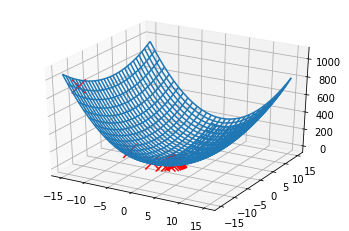

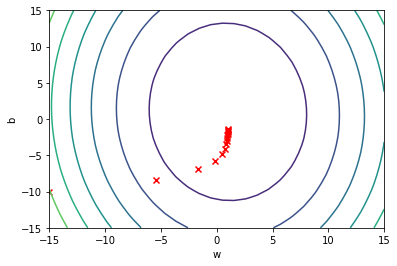

Text(24.125, 0.5, 'Cost')

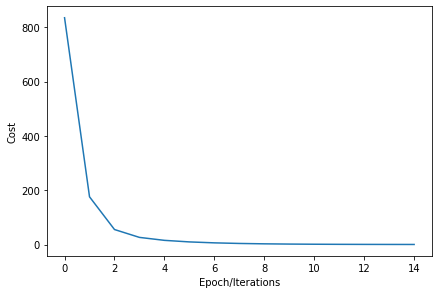

In [57]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(list_costs)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

# 3 Gradient Descent, Optimization

## 3.1 Stochastic Gradient Descent and the Data Loader

*   Overview of Stochastic Gradient Descent : select one sample and do weight update
*   Stochastic Gradient Descent in PyTorch
*   Stochastic Gradient Descent with Data Loader

In [110]:
w = torch.tensor(-15.0, requires_grad=True)
b = torch.tensor(-10.0, requires_grad=True)

X = torch.arange(-3, 3, 0.1).view(-1,1)
f = -3 * X

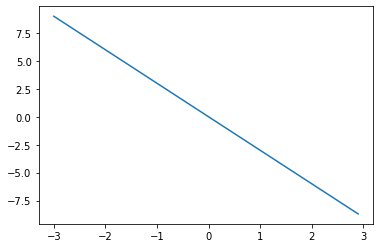

In [111]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(), f.numpy())
plt.show()

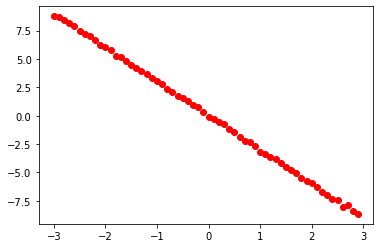

In [112]:
Y = f + 0.1*torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

<Figure size 432x288 with 0 Axes>

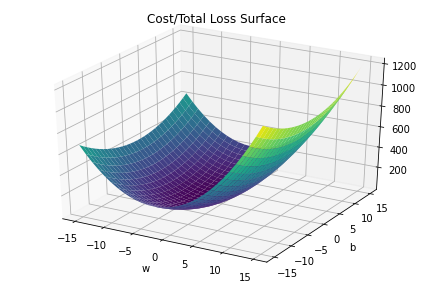

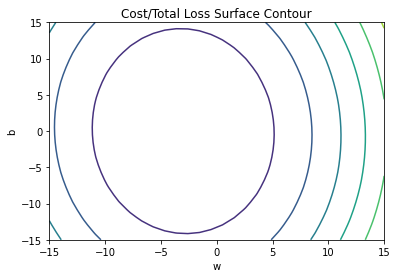

In [113]:
get_surface = plot_error_surfaces(15, 15, X, Y, 30)

In [114]:
def forward(x):
  return w*x + b

def criterion(yhat, y):
  # MSE Loss
  return torch.mean((yhat-y)**2)

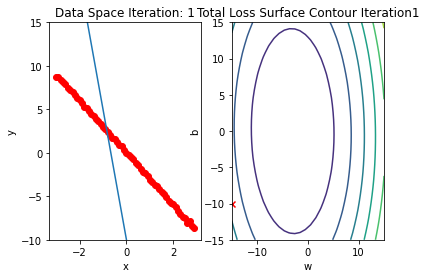

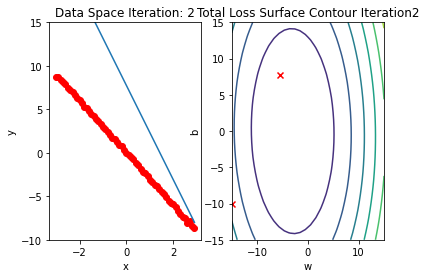

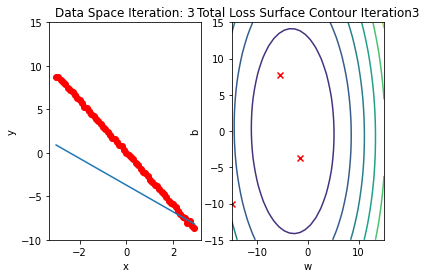

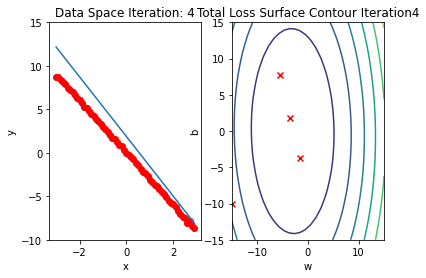

In [115]:
lr = 0.1
LOSS_SGD = []
list_w = [w.item()]
list_b = [b.item()]

for epoch in range(4):
  
  Yhat = forward(X)
  get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), criterion(Yhat, Y).tolist())
  get_surface.plot_ps()
  LOSS_SGD.append(criterion(forward(X), Y).tolist())
  for x, y in zip(X, Y):  # Training with one sample
    Yhat = forward(x)
    loss = criterion(Yhat, y)
    loss.backward()

    w.data = w.data - lr*w.grad.data
    w.grad.data.zero_()

    b.data = b.data - lr*b.grad.data
    b.grad.data.zero_()
    LOSS_SGD.append(loss)
    list_w.append(w.item())
    list_b.append(b.item())

In [116]:
# DataLoader
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1, 1)
    self.y = -3*X +1
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [76]:
dataset=Data()
x, y = dataset[0]
print(x, y)

tensor([-3.]) tensor([10.])


In [78]:
x, y = dataset[0:3]
print(x)
print(y)

tensor([[-3.0000],
        [-2.9000],
        [-2.8000]])
tensor([[10.0000],
        [ 9.7000],
        [ 9.4000]])


In [85]:
# Create DataLoader
trainloader = DataLoader(dataset = dataset, batch_size = 1)

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

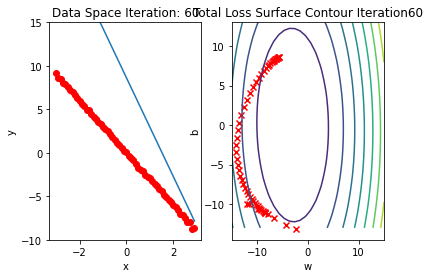

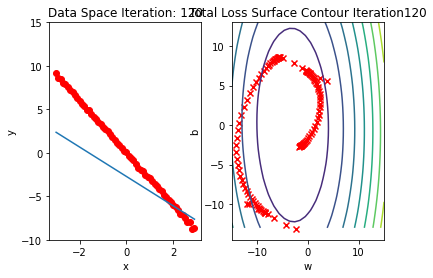

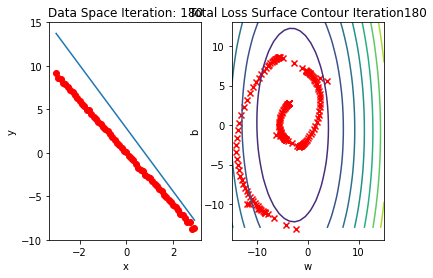

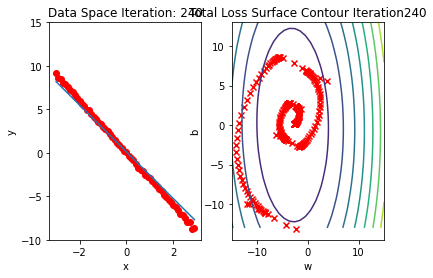

In [86]:

LOSS = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS.append(criterion(Yhat, X))
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
my_train_model(4)

## 3.2 Mini-Batch Gradient Descent
*   Basics of Mini-Batch Gradient Descent : select few samples and update weights
*   Mini-Batch Gradient Descent in PyTorch

In [125]:
dataset = Data()
trainloader = DataLoader(dataset=dataset, batch_size=5)

get_surface = plot_error_surfaces(15, 13, X, Y, 30, go = False)

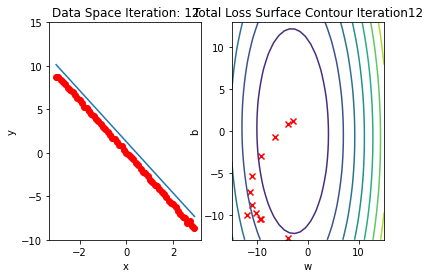

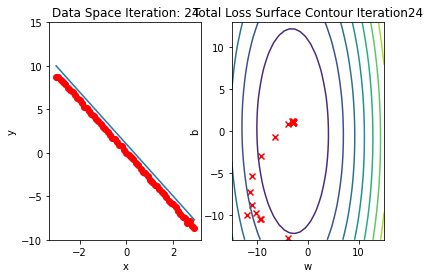

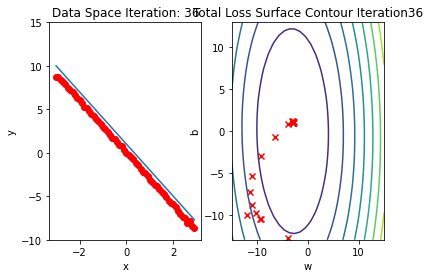

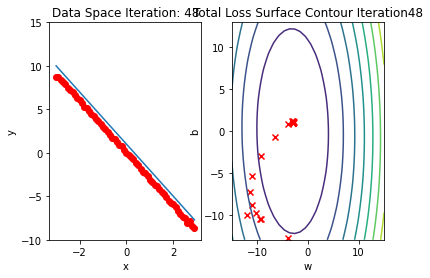

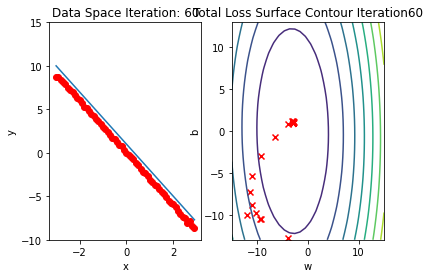

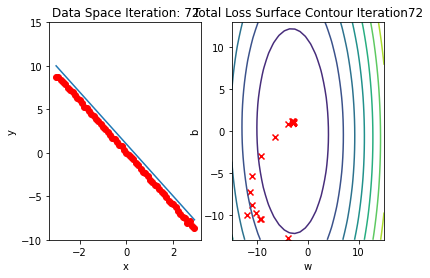

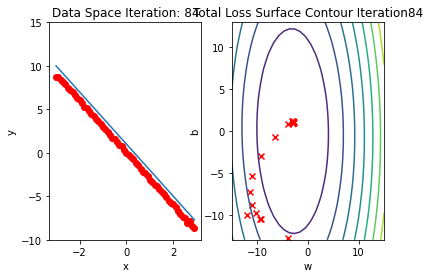

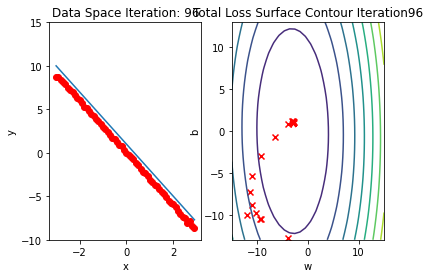

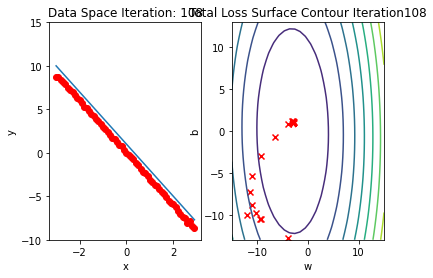

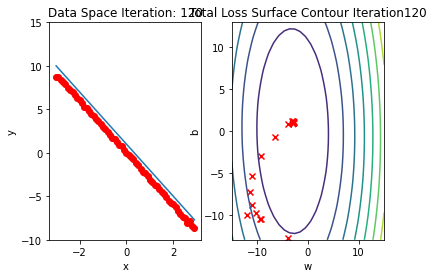

In [126]:
LOSS_MINI_5 = []
w = torch.tensor(-12.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

def my_train_model(epochs):
    for epoch in range(epochs):
        Yhat = forward(X)
        LOSS_MINI_5.append(criterion(Yhat, X))
        for x, y in trainloader:
            yhat = forward(x)
            loss = criterion(yhat, y)
            get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
            loss.backward()
            w.data = w.data - lr * w.grad.data
            b.data = b.data - lr * b.grad.data
            w.grad.data.zero_()
            b.grad.data.zero_()
        get_surface.plot_ps()
my_train_model(10)

In [127]:
len(LOSS_MINI_5)

10

In [109]:
len(X)

60

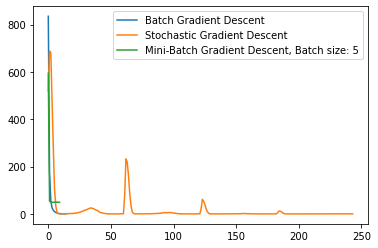

In [128]:
plt.plot(LOSS_BGD,label = "Batch Gradient Descent")
plt.plot(LOSS_SGD,label = "Stochastic Gradient Descent")
plt.plot(LOSS_MINI_5,label = "Mini-Batch Gradient Descent, Batch size: 5")
plt.legend()
plt.show()

## 3.3 Optimization in PyTorch

In [143]:
# 이전에는 W, B를 입력받았지만 이번엔 MODEL 통채로 입력받는게 다름
# class for ploting  

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30, 30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection = '3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1, cmap = 'viridis', edgecolor = 'none')
            plt.title('Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
            
    # Setter
    def set_para_loss(self, model, loss):
        self.n = self.n + 1
        self.LOSS.append(loss)
        self.W.append(list(model.parameters())[0].item())
        self.B.append(list(model.parameters())[1].item())
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W, self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
        
    # Plot diagram    
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim()
        plt.plot(self.x, self.y, 'ro', label = "training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))
        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Loss Surface Contour Iteration' + str(self.n) )
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

In [144]:
# DataLoader
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self):
    self.x = torch.arange(-3,3,0.1).view(-1, 1)
    self.y = -3*X +1
    self.len = self.x.shape[0]

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [145]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    output = self.linear(x)
    return output


In [146]:
# model init
model = LR(1,1)

model.state_dict()['linear.weight'][0] = -15
model.state_dict()['linear.bias'][0] = -10
get_surface = plot_error_surfaces(15, 13, dataset.x, dataset.y, 30, go = False)

In [147]:
# DataLoader
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim

trainloader = DataLoader(dataset=dataset, batch_size=1)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer.state_dict()

{'param_groups': [{'dampening': 0,
   'lr': 0.01,
   'momentum': 0,
   'nesterov': False,
   'params': [0, 1],
   'weight_decay': 0}],
 'state': {}}

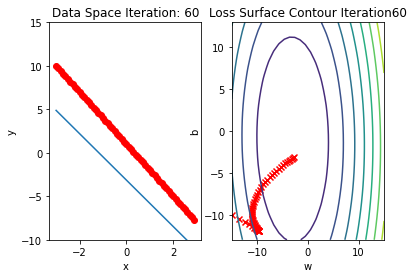

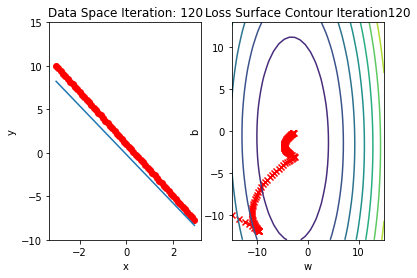

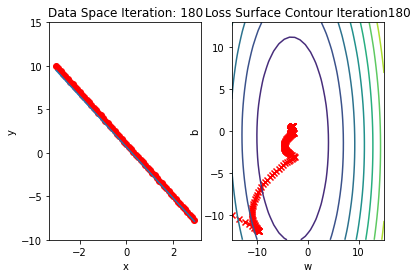

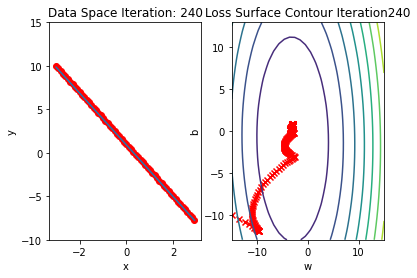

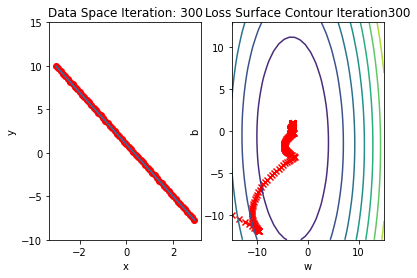

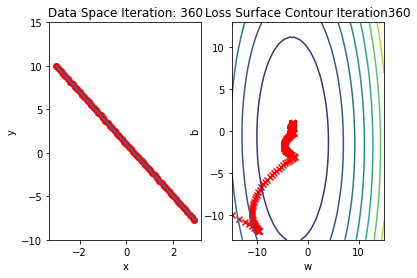

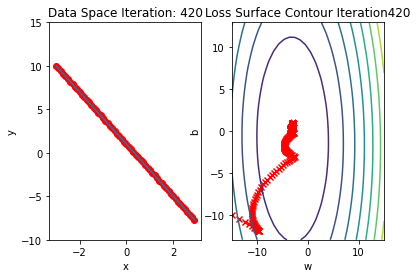

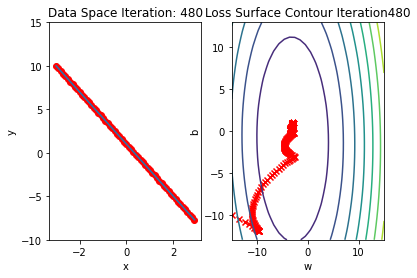

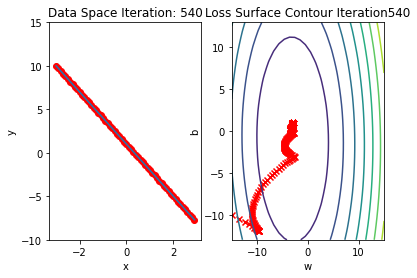

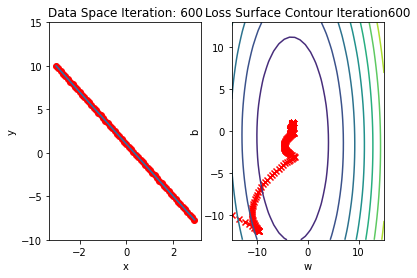

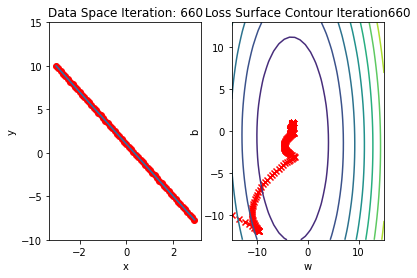

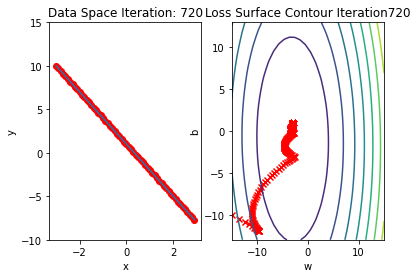

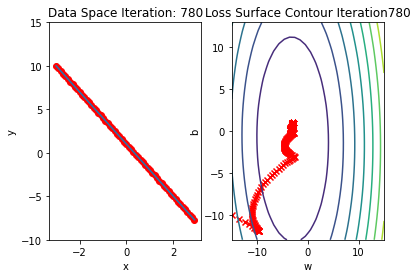

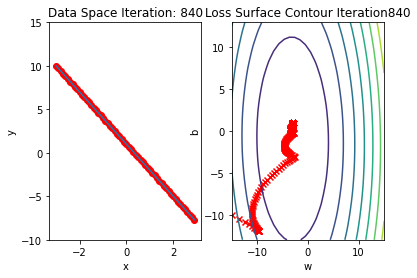

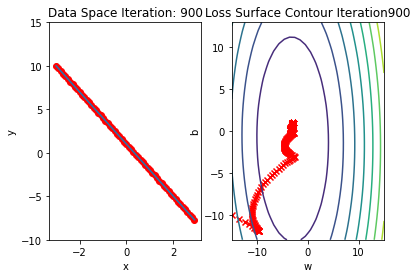

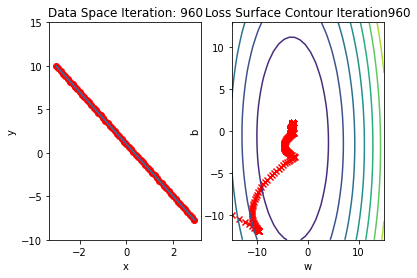

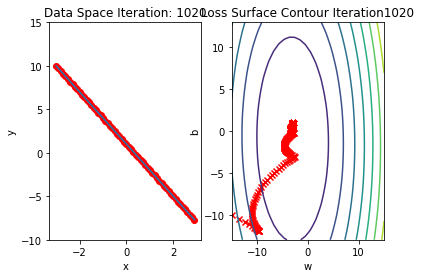

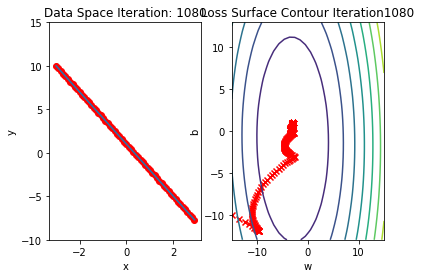

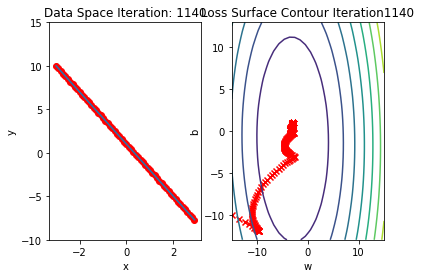

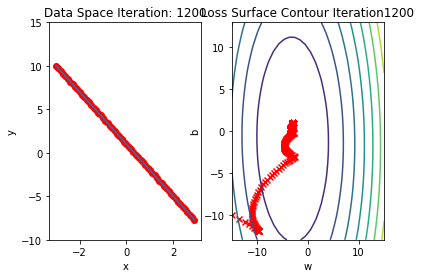

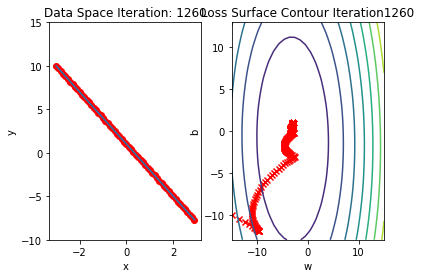

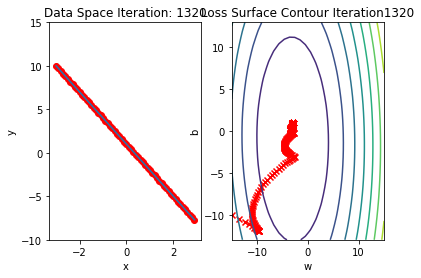

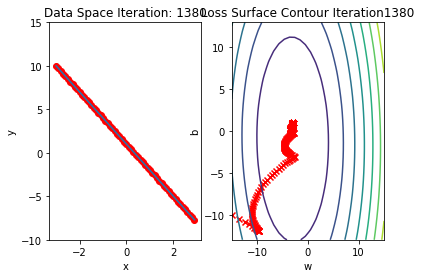

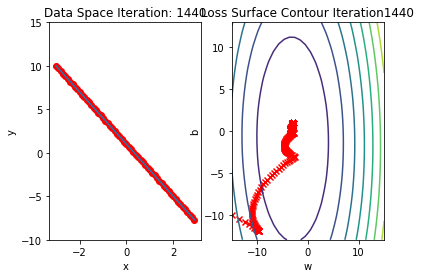

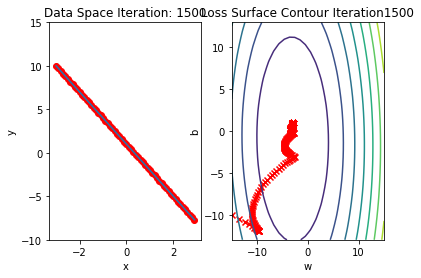

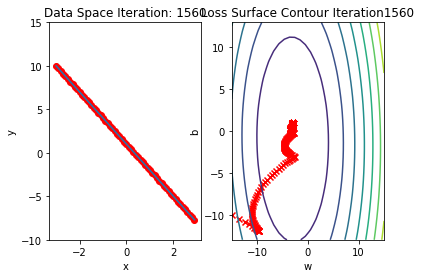

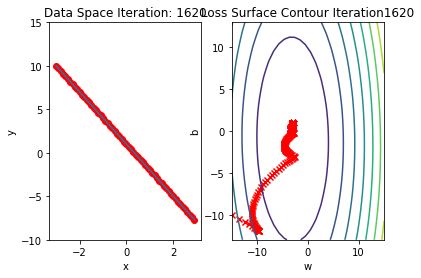

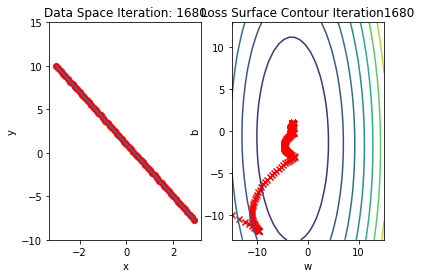

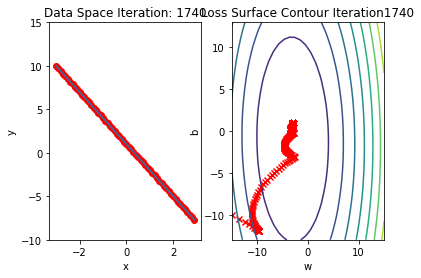

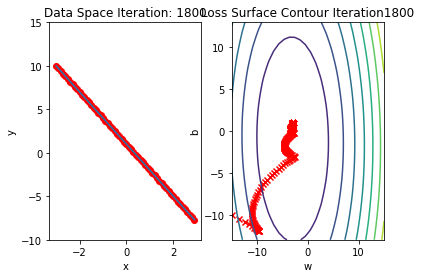

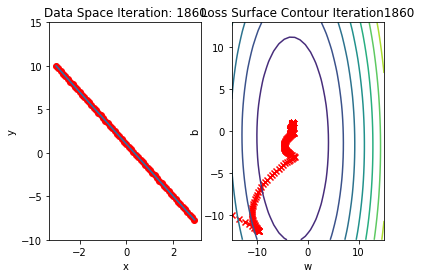

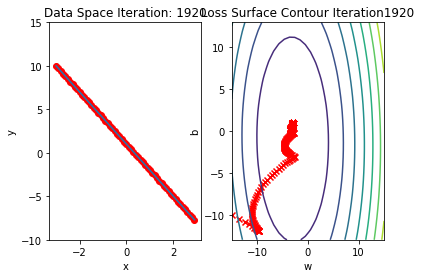

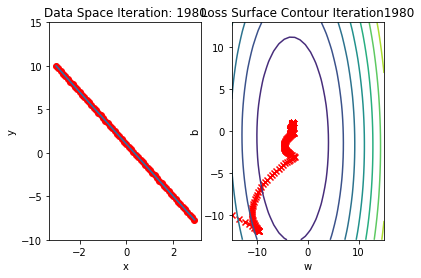

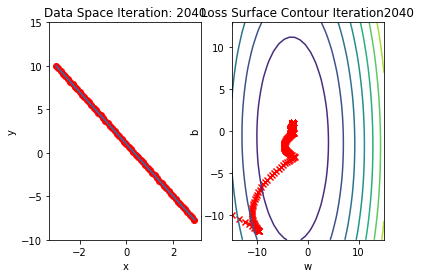

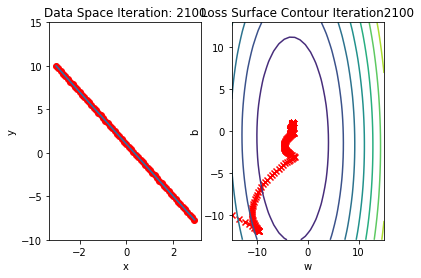

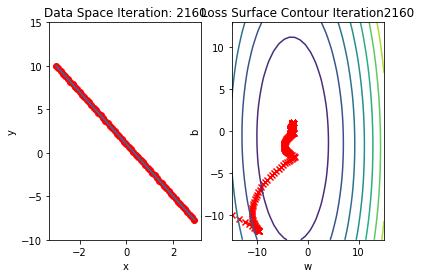

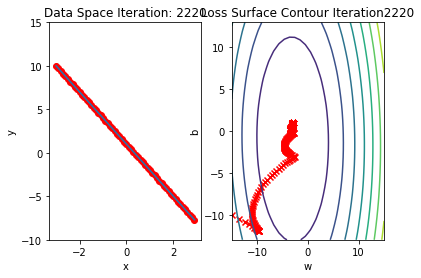

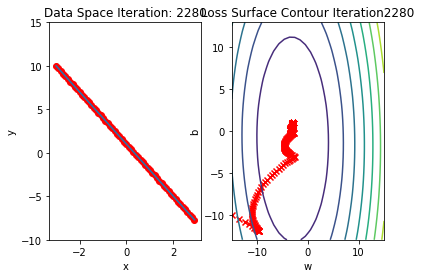

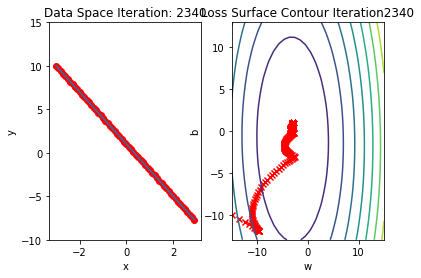

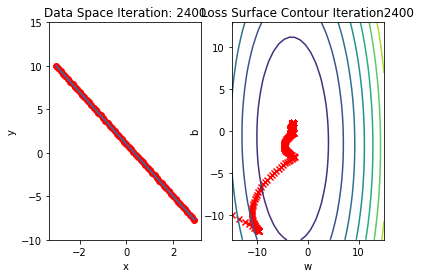

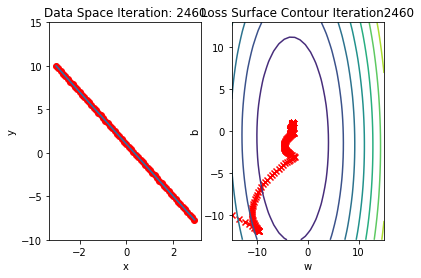

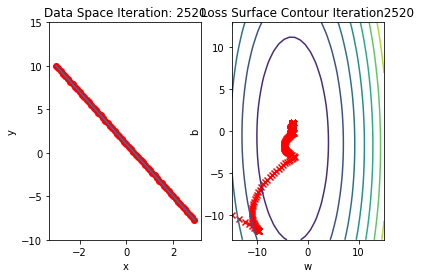

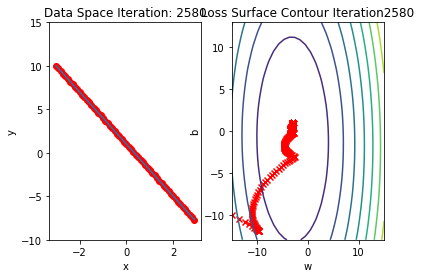

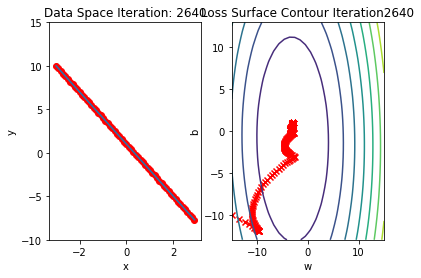

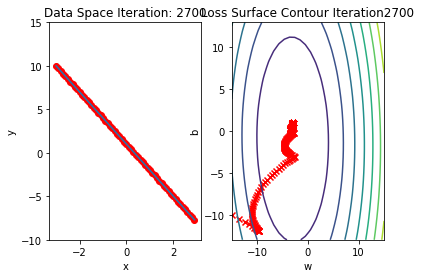

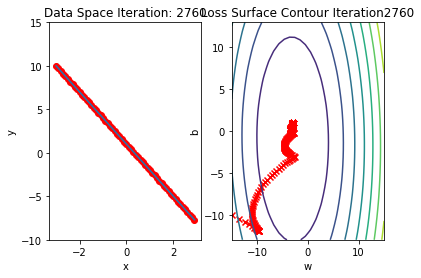

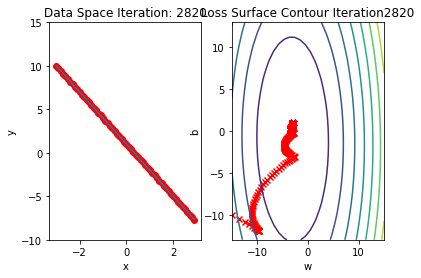

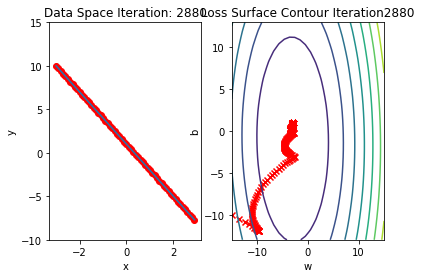

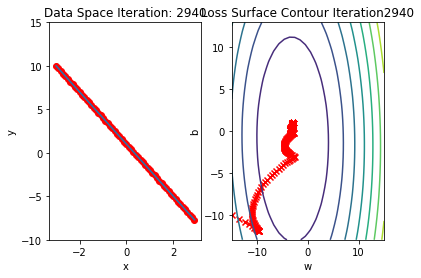

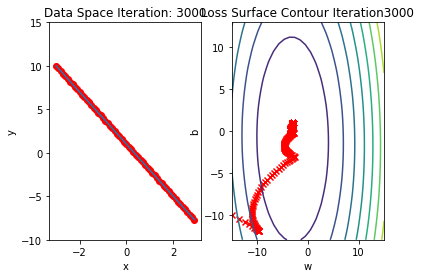

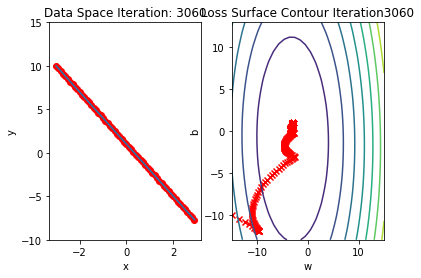

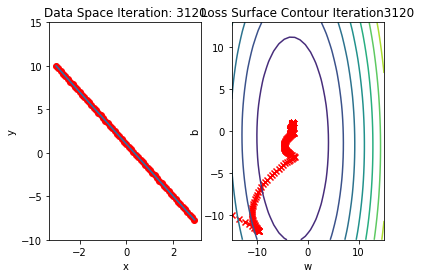

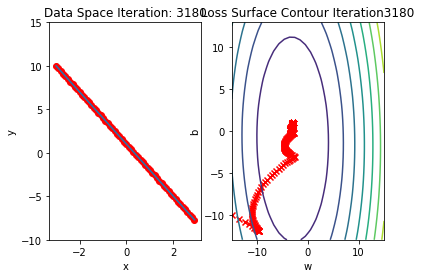

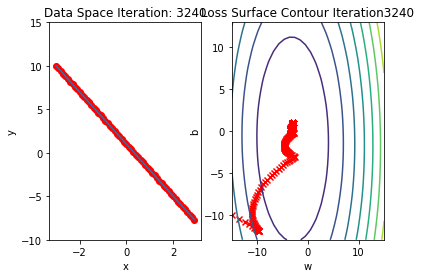

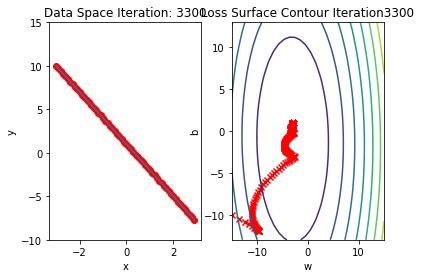

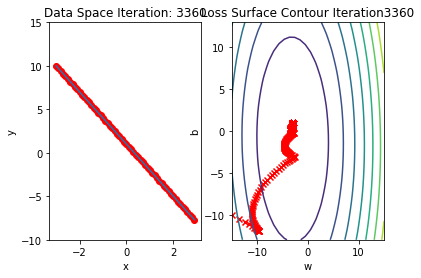

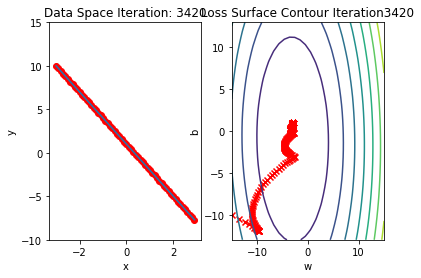

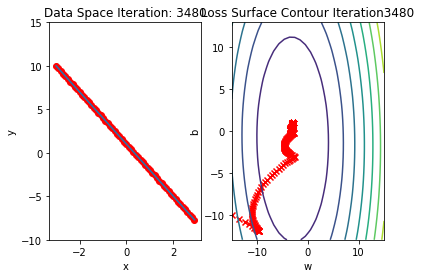

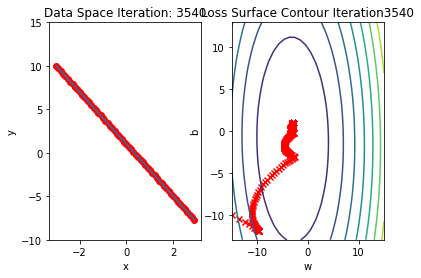

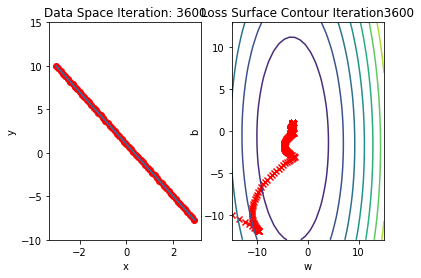

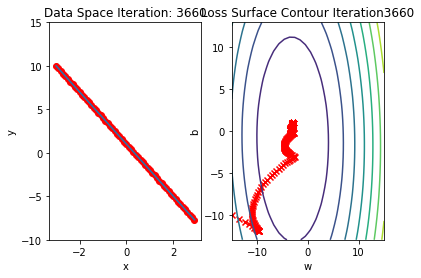

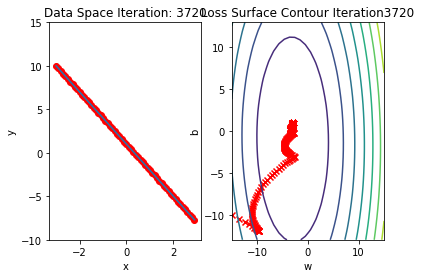

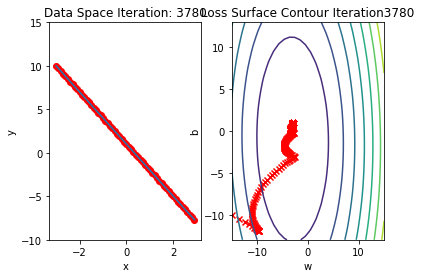

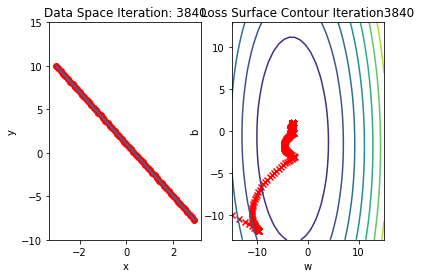

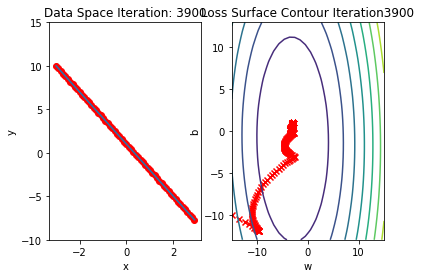

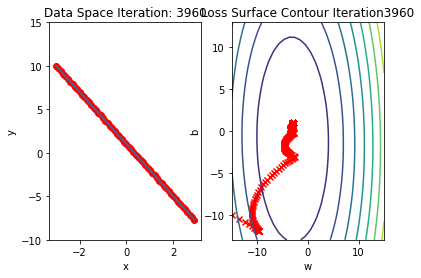

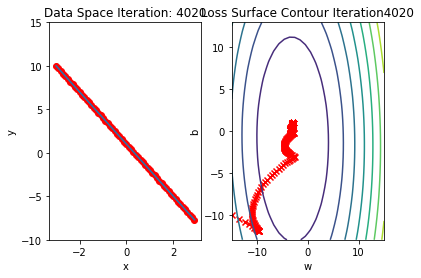

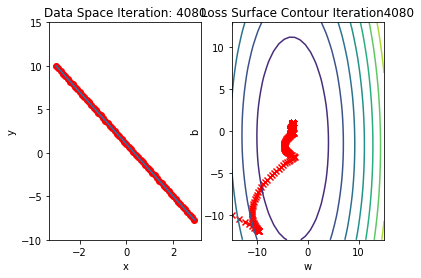

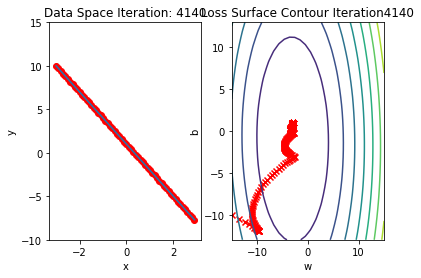

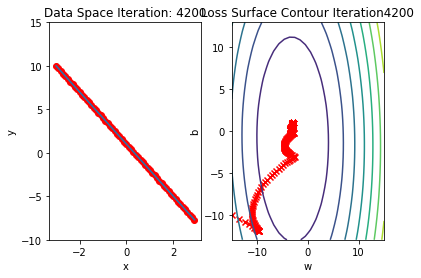

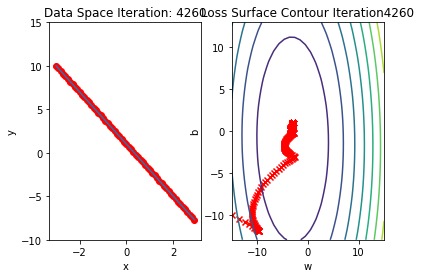

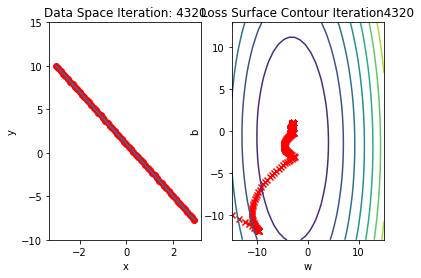

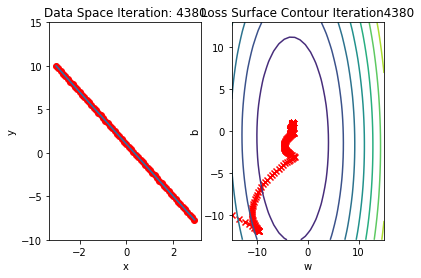

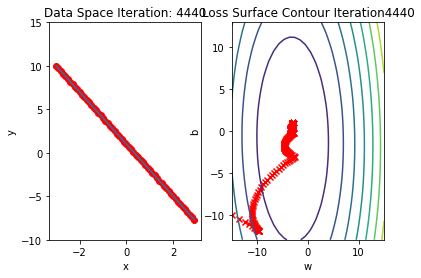

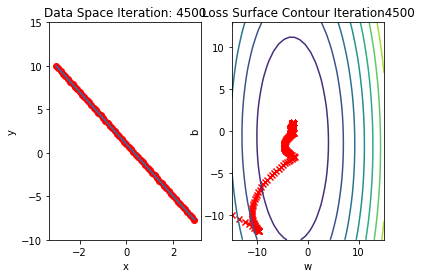

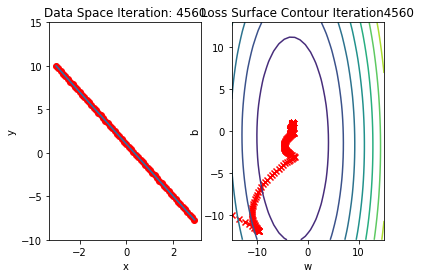

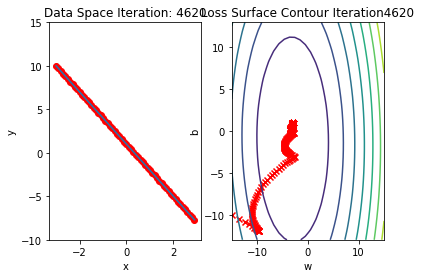

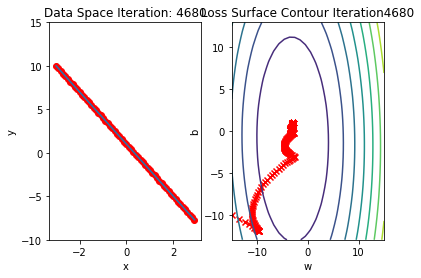

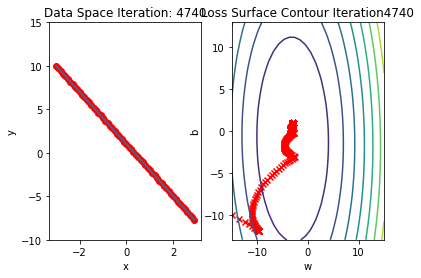

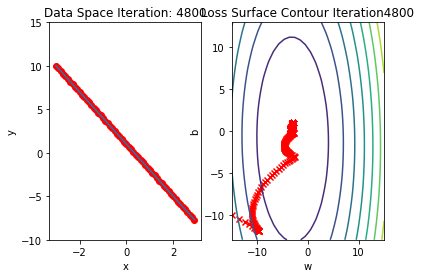

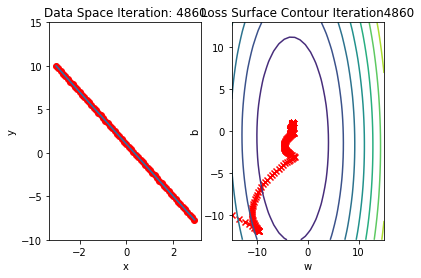

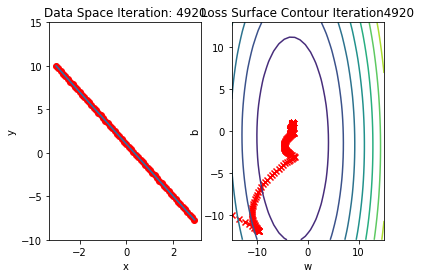

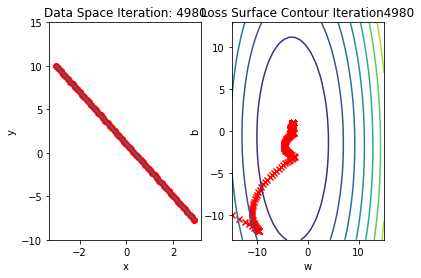

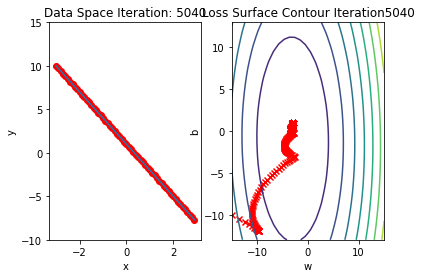

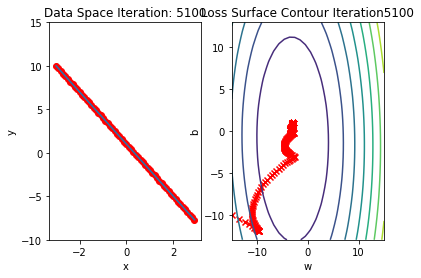

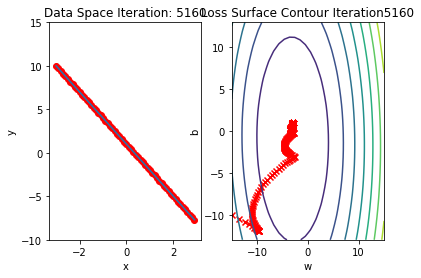

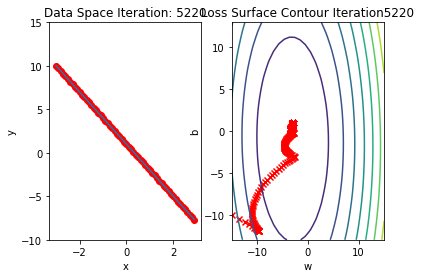

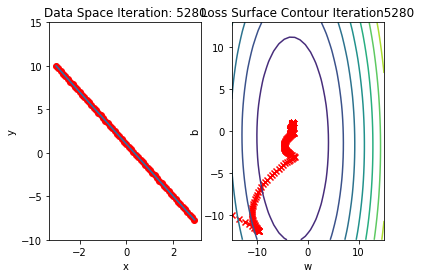

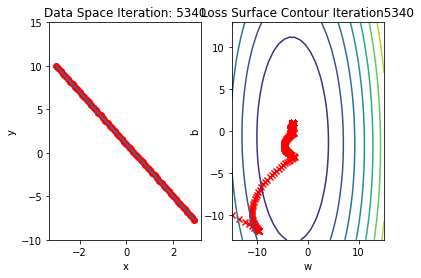

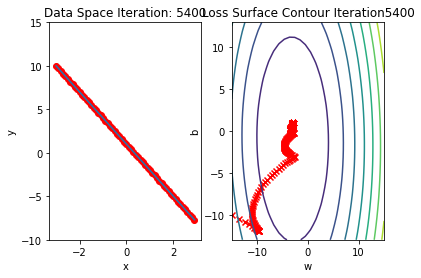

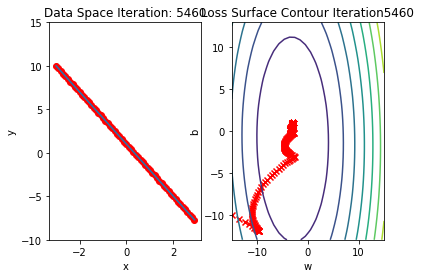

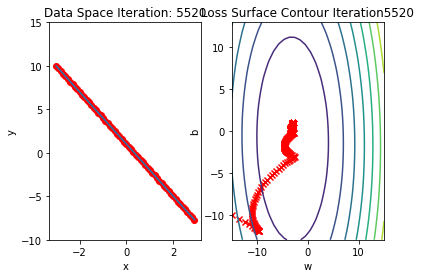

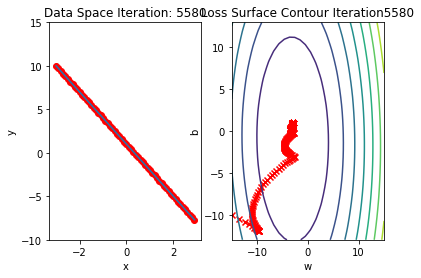

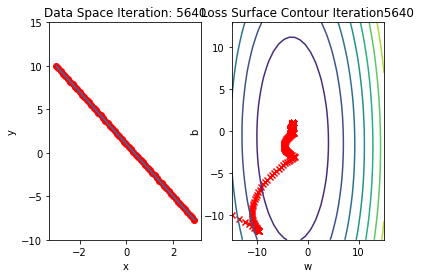

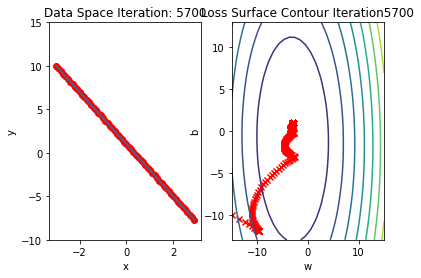

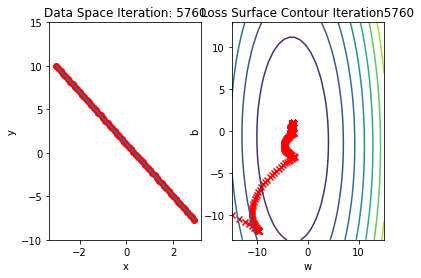

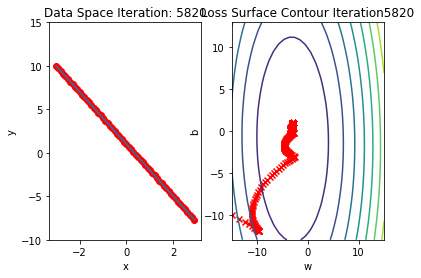

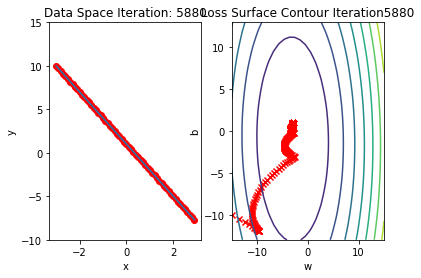

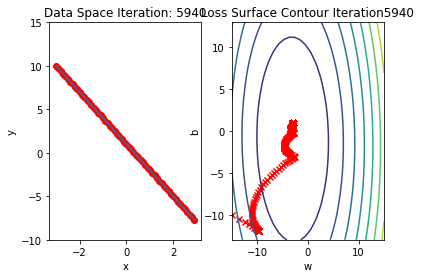

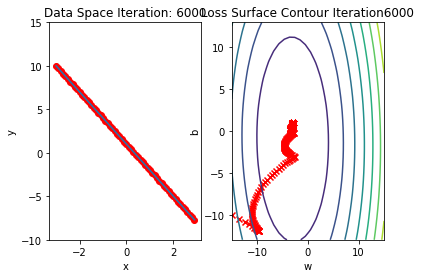

In [148]:
for epoch in range(100):
  for x, y in trainloader:
    yhat = model(x)
    loss = criterion(yhat, y)
    get_surface.set_para_loss(model, loss.tolist()) 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  get_surface.plot_ps()

## 3.4 Training, Validataion and Test Split

In [149]:
# DataLoader
from torch.utils.data import Dataset, DataLoader

class Data(Dataset):
  def __init__(self, is_train=True):
    self.x = torch.arange(-3,3,0.1).view(-1, 1)
    self.f = -3*X +1
    self.y = self.f + 0.1* torch.randn(self.x.size())
    self.len = self.x.shape[0]
    if is_train == True:
      self.y[0] = 0
      self.y[50:55] = 20    # Give Outliers
    else:
      pass

  def __getitem__(self, index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.len

In [151]:
train_data = Data()
val_data = Data(is_train=False)

In [152]:
import torch.nn as nn

class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super(LR, self).__init__()
    self.linear = nn.Linear(input_size, output_size)
  
  def forward(self, x):
    output = self.linear(x)
    return output

In [155]:
criterion = nn.MSELoss()

trainloader = DataLoader(dataset=train_data, batch_size=1)

In [159]:
# set hyperparameters
epochs = 10
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
train_error = torch.zeros(len(learning_rates))
validation_error = torch.zeros(len(learning_rates))

MODELS = []

In [160]:
# Train models for each learning rates
for i, learning_rate in enumerate(learning_rates):
  model = LR(1,1)
  optimizer = optim.SGD(model.parameters(), lr=learning_rate)

  #### Training
  for epoch in range(epochs):
      for x, y in trainloader:
          yhat = model(x)
          loss = criterion(yhat, y)
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
  ####

  yhat = model(train_data.x)
  loss = criterion(yhat, train_data.y)
  train_error[i] = loss.item()

  yhat = model(val_data.x)
  loss = criterion(yhat, val_data.y)
  validation_error[i] = loss.item()

  MODELS.append(model)

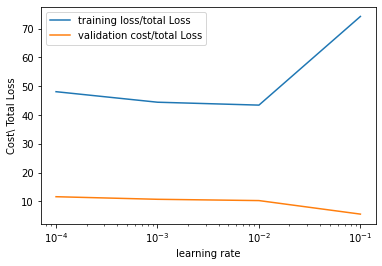

In [161]:
# Plot the training loss and validation loss
# learning rate가 1/10 씩 줄어들기에 시각화 할 때 log scaling 필요
plt.semilogx(np.array(learning_rates), train_error.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), validation_error.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

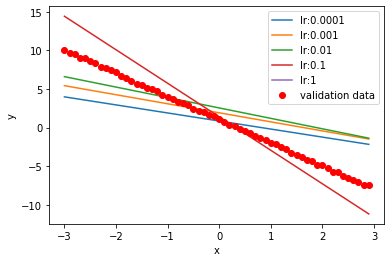

In [163]:
# Visualize the models
for model, learning_rate in zip(MODELS, learning_rates):
  yhat = model(val_data.x)
  plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label='lr:'+str(learning_rate))

plt.plot(val_data.x.numpy(), val_data.y.numpy(), 'or', label='validation data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()